In [1]:
!pip install pandas


In [2]:
!pip install dython

In [80]:
import pandas as pd
import glob
import os

In [5]:
from joblib import Parallel, delayed

In [7]:
import joblib
print(joblib.__version__)


1.2.0


In [5]:
import gc
gc.collect()  # Force garbage collection


0

In [22]:
# Define the file path
file_path =  r'C:/Users/aparn/Box/InTrans/RWRAD_Internal/Final_files_with_variables/Final_list_of_variables/weekly_stats_demo_cleaned_for_model_v2.csv'

# Read the CSV file into a DataFrame
weekly_stats_cleaned= pd.read_csv(file_path)

In [23]:
weekly_stats_cleaned['subj'].nunique()

119

In [24]:
# Drop columns 'B' and 'C'
weekly_stats_cleaned = weekly_stats_cleaned.drop(['Unnamed: 43', 'subj_type2'], axis=1)

In [25]:
# Remove the subject 'RWRAD_065' from the dataset
weekly_stats_cleaned_filtered = weekly_stats_cleaned[weekly_stats_cleaned['subj'] != 'RWRAD_065']

# Count the NaN values in each column after removing the subject
nan_count_filtered = weekly_stats_cleaned_filtered.isna().sum()

# Filter columns that have more than 0 NaN values
columns_with_nan_filtered = nan_count_filtered[nan_count_filtered > 0]

# Display the count of NaN values for each column with NaNs
columns_with_nan_filtered


avg_miles_per_chain                 921
avg_minutes_per_chain               921
stoppage_probability                981
education_years                       7
mean_efficiency                     162
mean_awakenings_mean_min            162
mean_awake_after_sleep_waso_min     162
errand_weekend_count                885
home_weekday_count                  404
medical_weekday_count              1023
none_weekday_count                  891
social_weekday_count               1500
dtype: int64

In [26]:
len(weekly_stats_cleaned_filtered)

1500

In [9]:
weekly_stats_cleaned.dtypes

subj                                object
week_number                          int64
year                                 int64
total_miles                        float64
total_trips                          int64
avg_miles_per_trip                 float64
total_minutes                      float64
avg_minutes_per_trip               float64
non_nighttime_trips                  int64
percent_non_nighttime              float64
am_7_9_trips                         int64
percent_am_7_9                     float64
nighttime_80_percent                 int64
percent_nighttime_80               float64
pm_4_6_trips                         int64
percent_pm_4_6                     float64
within_15_miles                      int64
percent_within_15_miles            float64
within_25_miles                      int64
percent_within_25_miles            float64
trip_chains                          int64
avg_miles_per_chain                float64
avg_minutes_per_chain              float64
speed_60_mp

In [ ]:
# Remove the subject 'RWRAD_065' from the dataset
weekly_stats_cleaned_filtered = weekly_stats_cleaned[weekly_stats_cleaned['subj'] != 'RWRAD_065']

# Count the NaN values in each column after removing the subject
nan_count_filtered = weekly_stats_cleaned_filtered.isna().sum()

# Filter columns that have more than 0 NaN values
columns_with_nan_filtered = nan_count_filtered[nan_count_filtered > 0]

# Display the count of NaN values for each column with NaNs
columns_with_nan_filtered


## Fill 0 in avg_miles_per_chain and avg_minutes_per_chain

In [13]:
weekly_stats_cleaned.head()

,subj,week_number,year,total_miles,total_trips,avg_miles_per_trip,total_minutes,avg_minutes_per_trip,non_nighttime_trips,percent_non_nighttime,...,race,education_numberofyears_nacc,mean_efficiency,mean_awakenings_mean_min,mean_awake_after_sleep_waso_min,errand_weekend_count,home_weekday_count,medical_weekday_count,none_weekday_count,social_weekday_count
0,RWRAD_001,11,2021,81.858703,17,4.815218,284.533333,16.737255,17,100.0,...,white,18,NaN,NaN,NaN,1.0,6.0,1.0,NaN,NaN
1,RWRAD_001,12,2021,89.800539,22,4.081843,303.000000,13.772727,22,100.0,...,white,18,NaN,NaN,NaN,2.0,8.0,NaN,NaN,NaN
2,RWRAD_001,13,2021,311.730769,31,10.055831,612.866667,19.769892,31,100.0,...,white,18,0.865308,3.061806,45.250000,NaN,12.0,NaN,NaN,NaN
3,RWRAD_001,14,2021,83.971941,26,3.229690,311.983333,11.999359,26,100.0,...,white,18,0.879807,3.095035,45.714286,3.0,7.0,NaN,NaN,NaN
4,RWRAD_001,15,2021,151.992413,20,7.599621,296.400000,14.820000,20,100.0,...,white,18,0.875554,4.256156,53.857143,1.0,6.0,NaN,NaN,NaN


In [15]:
weekly_stats_cleaned[['avg_miles_per_chain', 'avg_minutes_per_chain']] = weekly_stats_cleaned[['avg_miles_per_chain', 'avg_minutes_per_chain']].fillna(0)


## Fill 0 in end trip variables

In [16]:
# Fill NaN values with 0 in the specific columns
columns_to_fill = [
    'errand_weekend_count', 
    'home_weekday_count', 
    'medical_weekday_count', 
    'none_weekday_count', 
    'social_weekday_count'
]

weekly_stats_cleaned[columns_to_fill] = weekly_stats_cleaned[columns_to_fill].fillna(0)



# Categorical to binary (label encoder)

In [17]:
# Ensure you are modifying the original DataFrame using .loc[]
weekly_stats_cleaned.loc[:, 'subj_type'] = weekly_stats_cleaned['subj_type'].apply(lambda x: 1 if x in ['mci', 'alzheimers'] else 0)

## mci/alzheimers= 1 and normalaging =0

# One hot encode (gender)

In [18]:
# Apply one-hot encoding using pd.get_dummies for 'gender' and 'race'
weekly_stats_cleaned = pd.get_dummies(weekly_stats_cleaned, columns=['gender'], drop_first=True)

In [19]:
# Ensure the columns are in int format after transformation
#weekly_stats_cleaned['race_white'] = weekly_stats_cleaned['race_white'].astype(int)
weekly_stats_cleaned['gender_male'] = weekly_stats_cleaned['gender_male'].astype(int)
weekly_stats_cleaned['subj_type'] = weekly_stats_cleaned['subj_type'].astype(int)


In [20]:
weekly_stats_cleaned.dtypes

subj                                object
week_number                          int64
year                                 int64
total_miles                        float64
total_trips                          int64
avg_miles_per_trip                 float64
total_minutes                      float64
avg_minutes_per_trip               float64
non_nighttime_trips                  int64
percent_non_nighttime              float64
am_7_9_trips                         int64
percent_am_7_9                     float64
nighttime_80_percent                 int64
percent_nighttime_80               float64
pm_4_6_trips                         int64
percent_pm_4_6                     float64
within_15_miles                      int64
percent_within_15_miles            float64
within_25_miles                      int64
percent_within_25_miles            float64
trip_chains                          int64
avg_miles_per_chain                float64
avg_minutes_per_chain              float64
speed_60_mp

## XGBoost with LOSO cross validation

### With parallel processing

#### 1) Using all variables

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  84 out of 119 | elapsed: 11.8min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  96 out of 119 | elapsed: 13.3min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done 108 out of 119 | elapsed: 14.9min remaining:  1.5min



Mean Feature Importance Across All Subjects:
gender_male                        0.187078
mean_awakenings_mean_min           0.105026
age                                0.045966
avg_trip_accel_x                   0.043770
mean_efficiency                    0.037648
stoppage_probability               0.037104
education_numberofyears_nacc       0.035884
percent_within_25_miles            0.031559
mean_awake_after_sleep_waso_min    0.031475
trip_chains                        0.027435
avg_miles_per_trip                 0.026881
within_25_miles                    0.026765
avg_trip_speed                     0.024930
within_15_miles                    0.022074
avg_minutes_per_trip               0.022049
hard_brake_events                  0.021217
percent_pm_4_6                     0.019977
total_minutes                      0.019283
errand_weekend_count               0.018963
avg_minutes_per_chain              0.018273
avg_miles_per_chain                0.018098
percent_within_15_miles       

[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed: 15.4min finished


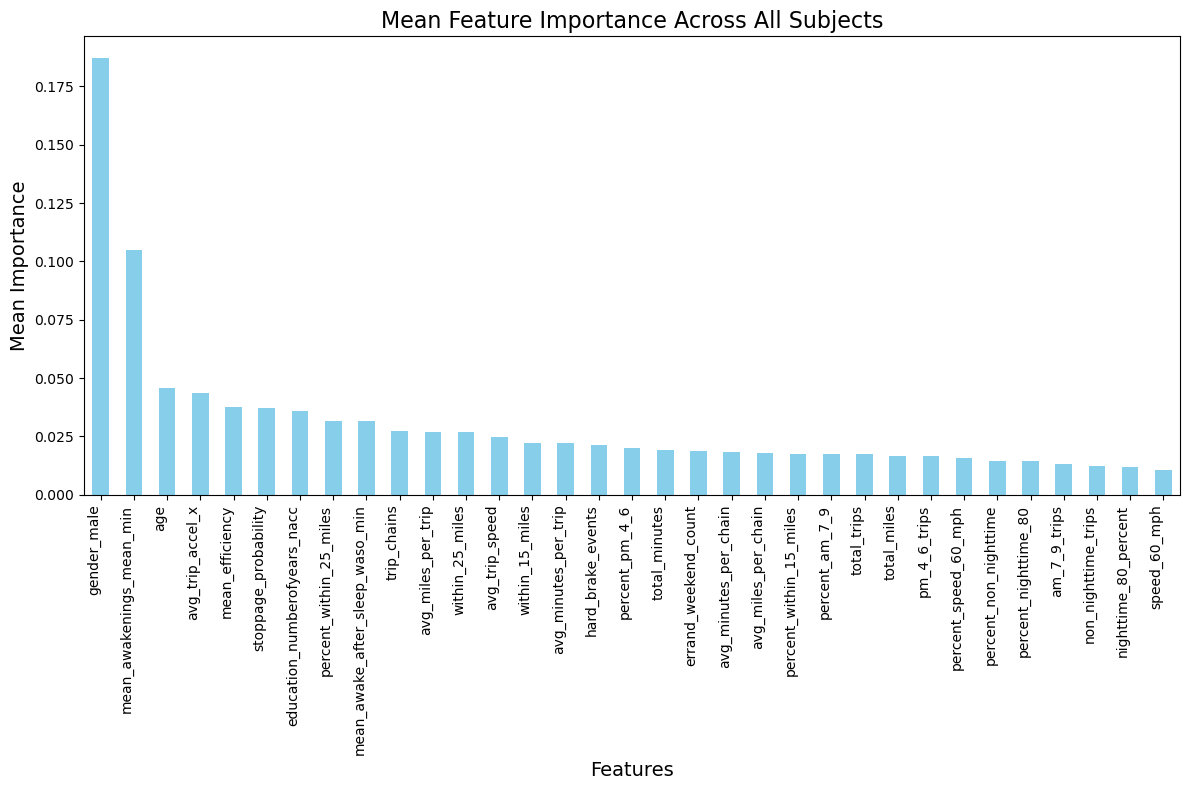

In [313]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}

def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Handle class imbalance
    num_class_0 = sum(y_train == 0)
    num_class_1 = sum(y_train == 1)
    scale_pos_weight = num_class_0 / num_class_1

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=80,  # Number of random combinations to try
        scoring='recall',
        cv=10,  # 10-fold cross-validation
        n_jobs=-1,  # Parallel processing within RandomizedSearchCV
        verbose=0
    )

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances from the best model
    try:
        feature_importances = best_model.feature_importances_
    except AttributeError:
        print(f"Warning: feature_importances_ not available for subject {left_out_subject}")
        feature_importances = None

    # Collect results
    subject_results = []
    for true_label, predicted_label, idx in zip(y_test, y_pred, X_test.index):
        subject_results.append([left_out_subject, idx, true_label, predicted_label, train_accuracy, test_accuracy, random_search.best_params_])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    print("\nMean Feature Importance Across All Subjects:")
    print(mean_feature_importance)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")


In [317]:
# Define the file path
#file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/losocv_results_with_hyperparameter_tuning_parallel_all_var.csv'

# Read the CSV file into a DataFrame
#losocv_results= pd.read_csv(file_path)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract true labels and predicted labels
true_labels = losocv_results['True Label']
predicted_labels = losocv_results['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6583
Precision: 0.7101
Recall: 0.7372
F1 Score: 0.7234


In [159]:
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_all_var.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_all_var.csv", index=True)

### 2) Using Only demographics

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  84 out of 119 | elapsed:  6.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  96 out of 119 | elapsed:  7.7min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done 108 out of 119 | elapsed:  8.5min remaining:   51.5s



Mean Feature Importance Across All Subjects:
gender_male                     0.475535
age                             0.279166
education_numberofyears_nacc    0.245299
dtype: float32


[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:  8.9min finished


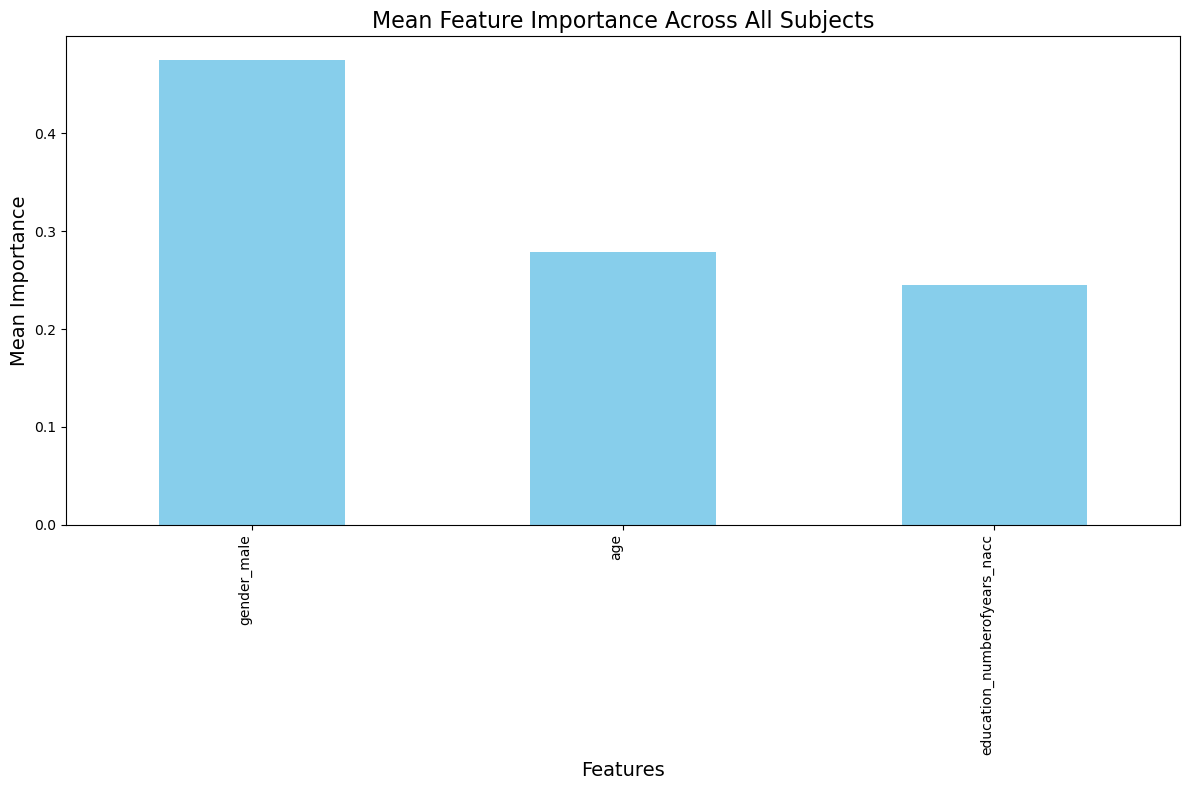

In [115]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Assuming weekly_stats_cleaned is your original dataframe
selected_columns = ['gender_male', 'age', 'education_numberofyears_nacc']
X = weekly_stats_cleaned[selected_columns]
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

# # Define parameter grid for hyperparameter tuning
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'reg_alpha': [0, 1, 5],
#     'reg_lambda': [1, 5, 10]
# }

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}

def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Handle class imbalance
    num_class_0 = sum(y_train == 0)
    num_class_1 = sum(y_train == 1)
    scale_pos_weight = num_class_0 / num_class_1

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=70,  # Number of random combinations to try
        scoring='recall',
        cv=10,  # 10-fold cross-validation
        n_jobs=-1,  # Parallel processing within RandomizedSearchCV
        verbose=0
    )

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances from the best model
    try:
        feature_importances = best_model.feature_importances_
    except AttributeError:
        print(f"Warning: feature_importances_ not available for subject {left_out_subject}")
        feature_importances = None

    # Collect results
    subject_results = []
    for true_label, predicted_label, idx in zip(y_test, y_pred, X_test.index):
        subject_results.append([left_out_subject, idx, true_label, predicted_label, train_accuracy, test_accuracy, random_search.best_params_])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    print("\nMean Feature Importance Across All Subjects:")
    print(mean_feature_importance)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_demographics.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_demographics.csv", index=True)



In [143]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/losocv_results_with_hyperparameter_tuning_parallel_demographics.csv'

# Read the CSV file into a DataFrame
losocv_results= pd.read_csv(file_path)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract true labels and predicted labels
true_labels = losocv_results['True Label']
predicted_labels = losocv_results['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6200
Precision: 0.7055
Recall: 0.6401
F1 Score: 0.6712


### 3) Using Only Driving Features

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  84 out of 119 | elapsed: 17.6min remaining:  7.3min
[Parallel(n_jobs=-1)]: Done  96 out of 119 | elapsed: 20.4min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done 108 out of 119 | elapsed: 22.3min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed: 23.5min finished



Mean Feature Importance Across All Subjects:
avg_trip_accel_x           0.084354
stoppage_probability       0.070209
avg_miles_per_trip         0.050947
errand_weekend_count       0.048238
trip_chains                0.044354
percent_speed_60_mph       0.040747
within_15_miles            0.040097
percent_nighttime_80       0.036858
avg_minutes_per_trip       0.035736
avg_trip_speed             0.035077
am_7_9_trips               0.034928
percent_am_7_9             0.034896
total_minutes              0.032757
nighttime_80_percent       0.032156
hard_brake_events          0.031720
speed_60_mph               0.031559
pm_4_6_trips               0.030819
non_nighttime_trips        0.030461
total_miles                0.030002
total_trips                0.029440
percent_pm_4_6             0.029054
percent_within_15_miles    0.028523
avg_minutes_per_chain      0.028421
avg_miles_per_chain        0.027636
percent_within_25_miles    0.027231
percent_non_nighttime      0.027161
within_25_miles   

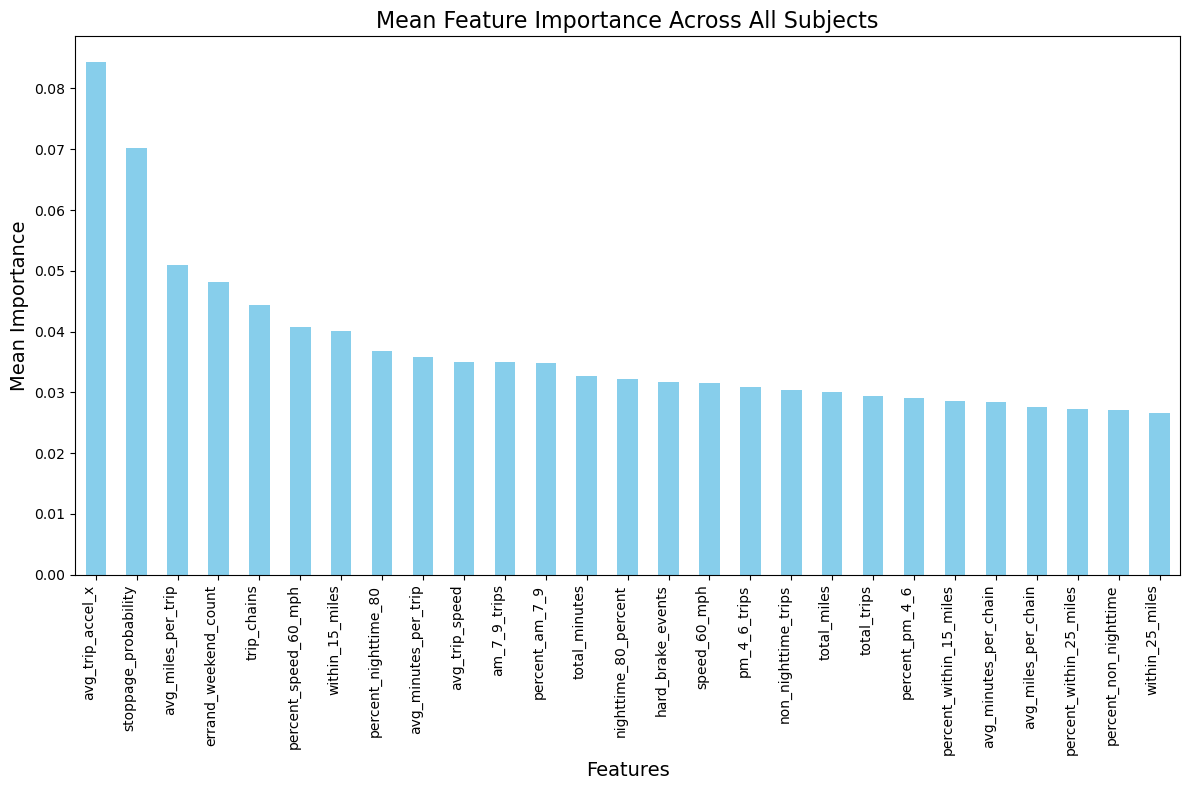

In [116]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count', 'gender_male', 'age', 'education_numberofyears_nacc', 'mean_awakenings_mean_min', 'mean_efficiency', 'mean_awake_after_sleep_waso_min'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

# # Define parameter grid for hyperparameter tuning
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'reg_alpha': [0, 1, 5],
#     'reg_lambda': [1, 5, 10]
# }

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}

def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Handle class imbalance
    num_class_0 = sum(y_train == 0)
    num_class_1 = sum(y_train == 1)
    scale_pos_weight = num_class_0 / num_class_1

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=70,  # Number of random combinations to try
        scoring='recall',
        cv=10,  # 10-fold cross-validation
        n_jobs=-1,  # Parallel processing within RandomizedSearchCV
        verbose=0
    )

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances from the best model
    try:
        feature_importances = best_model.feature_importances_
    except AttributeError:
        print(f"Warning: feature_importances_ not available for subject {left_out_subject}")
        feature_importances = None

    # Collect results
    subject_results = []
    for true_label, predicted_label, idx in zip(y_test, y_pred, X_test.index):
        subject_results.append([left_out_subject, idx, true_label, predicted_label, train_accuracy, test_accuracy, random_search.best_params_])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    print("\nMean Feature Importance Across All Subjects:")
    print(mean_feature_importance)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_driving_var.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_driving_var.csv", index=True)



In [147]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/losocv_results_with_hyperparameter_tuning_parallel_driving_var.csv'

# Read the CSV file into a DataFrame
losocv_results= pd.read_csv(file_path)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract true labels and predicted labels
true_labels = losocv_results['True Label']
predicted_labels = losocv_results['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5215
Precision: 0.6134
Recall: 0.5692
F1 Score: 0.5905


### 4) Using Only Sleep

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  84 out of 119 | elapsed:  8.1min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  96 out of 119 | elapsed:  9.1min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done 108 out of 119 | elapsed: 10.0min remaining:  1.0min



Mean Feature Importance Across All Subjects:
mean_awakenings_mean_min           0.642147
mean_awake_after_sleep_waso_min    0.207174
mean_efficiency                    0.150679
dtype: float32


[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed: 10.5min finished


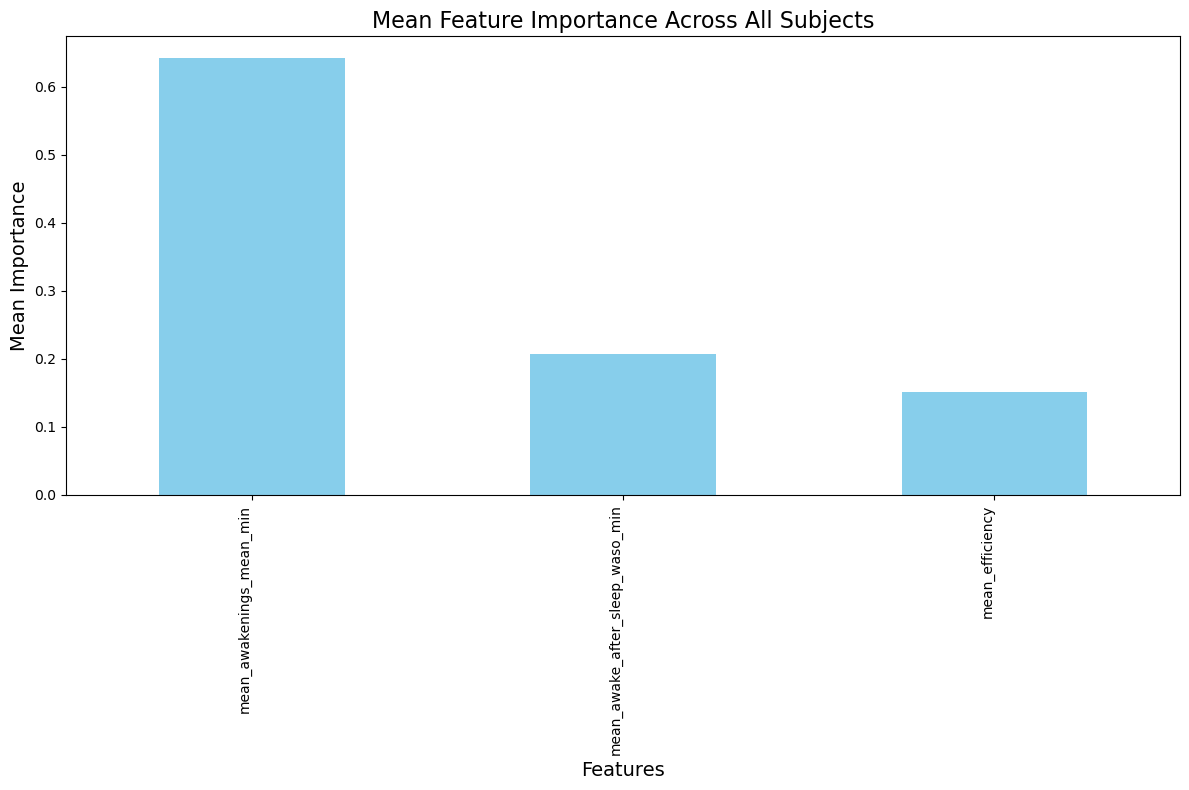

In [117]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Assuming weekly_stats_cleaned is your original dataframe
selected_columns = ['mean_awakenings_mean_min', 'mean_efficiency', 'mean_awake_after_sleep_waso_min']
X = weekly_stats_cleaned[selected_columns]
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

# # Define parameter grid for hyperparameter tuning
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'reg_alpha': [0, 1, 5],
#     'reg_lambda': [1, 5, 10]
# }

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}

def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Handle class imbalance
    num_class_0 = sum(y_train == 0)
    num_class_1 = sum(y_train == 1)
    scale_pos_weight = num_class_0 / num_class_1

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=70,  # Number of random combinations to try
        scoring='recall',
        cv=10,  # 10-fold cross-validation
        n_jobs=-1,  # Parallel processing within RandomizedSearchCV
        verbose=0
    )

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances from the best model
    try:
        feature_importances = best_model.feature_importances_
    except AttributeError:
        print(f"Warning: feature_importances_ not available for subject {left_out_subject}")
        feature_importances = None

    # Collect results
    subject_results = []
    for true_label, predicted_label, idx in zip(y_test, y_pred, X_test.index):
        subject_results.append([left_out_subject, idx, true_label, predicted_label, train_accuracy, test_accuracy, random_search.best_params_])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    print("\nMean Feature Importance Across All Subjects:")
    print(mean_feature_importance)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_sleep.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_sleep.csv", index=True)



In [149]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/losocv_results_with_hyperparameter_tuning_parallel_sleep.csv'

# Read the CSV file into a DataFrame
losocv_results= pd.read_csv(file_path)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract true labels and predicted labels
true_labels = losocv_results['True Label']
predicted_labels = losocv_results['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6186
Precision: 0.6968
Recall: 0.6565
F1 Score: 0.6760


### 5) Using Only Demographics and Driving

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done  84 out of 119 | elapsed: 18.9min remaining:  7.9min
[Parallel(n_jobs=-1)]: Done  96 out of 119 | elapsed: 21.7min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done 108 out of 119 | elapsed: 24.9min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed: 24.9min finished



Mean Feature Importance Across All Subjects:
gender_male                     0.152529
age                             0.061708
avg_trip_accel_x                0.061620
stoppage_probability            0.052031
education_numberofyears_nacc    0.045889
trip_chains                     0.040335
avg_minutes_per_chain           0.033512
percent_within_25_miles         0.033134
total_trips                     0.031808
within_15_miles                 0.031420
avg_miles_per_trip              0.029882
within_25_miles                 0.029428
avg_miles_per_chain             0.029367
errand_weekend_count            0.029315
hard_brake_events               0.025410
avg_trip_speed                  0.025179
avg_minutes_per_trip            0.024489
total_minutes                   0.023690
nighttime_80_percent            0.023468
pm_4_6_trips                    0.022666
percent_speed_60_mph            0.022296
am_7_9_trips                    0.021689
percent_pm_4_6                  0.021373
total_miles

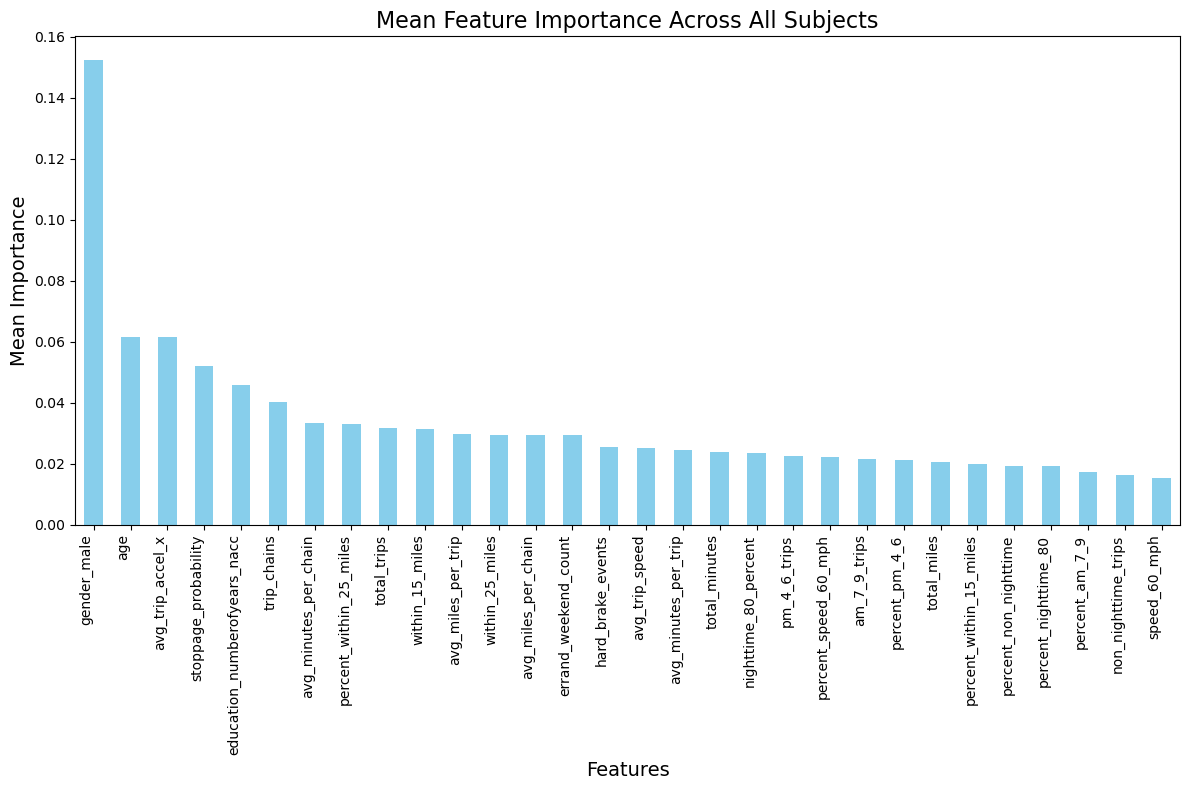

In [118]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count', 'mean_awakenings_mean_min', 'mean_efficiency', 'mean_awake_after_sleep_waso_min'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

# # Define parameter grid for hyperparameter tuning
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'reg_alpha': [0, 1, 5],
#     'reg_lambda': [1, 5, 10]
# }

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}

def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Handle class imbalance
    num_class_0 = sum(y_train == 0)
    num_class_1 = sum(y_train == 1)
    scale_pos_weight = num_class_0 / num_class_1

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=70,  # Number of random combinations to try
        scoring='recall',
        cv=10,  # 10-fold cross-validation
        n_jobs=-1,  # Parallel processing within RandomizedSearchCV
        verbose=0
    )

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances from the best model
    try:
        feature_importances = best_model.feature_importances_
    except AttributeError:
        print(f"Warning: feature_importances_ not available for subject {left_out_subject}")
        feature_importances = None

    # Collect results
    subject_results = []
    for true_label, predicted_label, idx in zip(y_test, y_pred, X_test.index):
        subject_results.append([left_out_subject, idx, true_label, predicted_label, train_accuracy, test_accuracy, random_search.best_params_])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    print("\nMean Feature Importance Across All Subjects:")
    print(mean_feature_importance)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_driving_demo.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_driving_demo).csv", index=True)



In [151]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/losocv_results_with_hyperparameter_tuning_parallel_driving_demo.csv'

# Read the CSV file into a DataFrame
losocv_results= pd.read_csv(file_path)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract true labels and predicted labels
true_labels = losocv_results['True Label']
predicted_labels = losocv_results['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6272
Precision: 0.6837
Recall: 0.7165
F1 Score: 0.6997


### 6) Using Only Driving and Sleep

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done  84 out of 119 | elapsed: 24.9min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done  96 out of 119 | elapsed: 25.2min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done 108 out of 119 | elapsed: 28.4min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed: 28.5min finished



Mean Feature Importance Across All Subjects:
mean_awakenings_mean_min           0.064625
avg_trip_accel_x                   0.060931
stoppage_probability               0.046999
errand_weekend_count               0.044662
mean_efficiency                    0.039576
mean_awake_after_sleep_waso_min    0.039450
trip_chains                        0.037548
percent_am_7_9                     0.037376
am_7_9_trips                       0.037143
within_15_miles                    0.036593
percent_speed_60_mph               0.034460
avg_miles_per_trip                 0.034013
hard_brake_events                  0.032136
avg_minutes_per_chain              0.031336
avg_minutes_per_trip               0.030680
percent_pm_4_6                     0.029992
non_nighttime_trips                0.028039
total_minutes                      0.027776
total_miles                        0.027722
total_trips                        0.027701
nighttime_80_percent               0.026452
percent_nighttime_80          

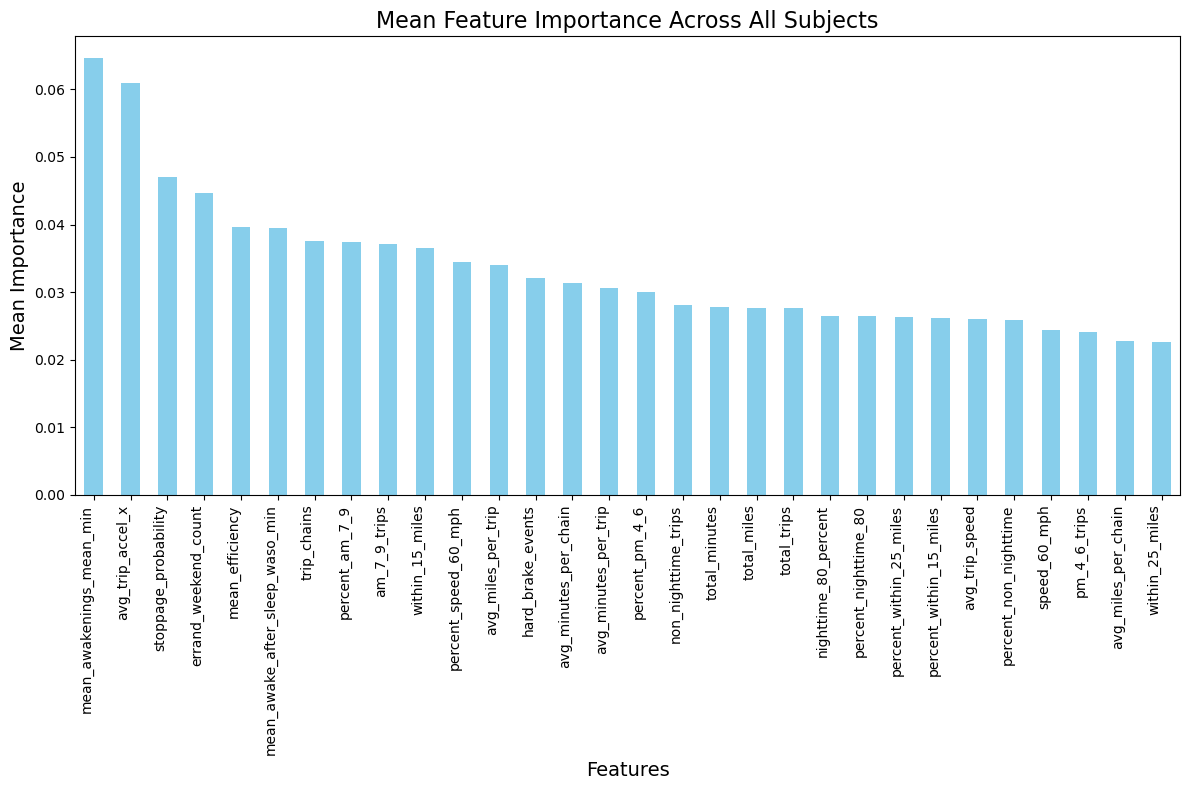

In [119]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count', 'gender_male', 'age', 'education_numberofyears_nacc'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}

def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Handle class imbalance
    num_class_0 = sum(y_train == 0)
    num_class_1 = sum(y_train == 1)
    scale_pos_weight = num_class_0 / num_class_1

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=70,  # Number of random combinations to try
        scoring='recall',
        cv=10,  # 10-fold cross-validation
        n_jobs=-1,  # Parallel processing within RandomizedSearchCV
        verbose=0
    )

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances from the best model
    try:
        feature_importances = best_model.feature_importances_
    except AttributeError:
        print(f"Warning: feature_importances_ not available for subject {left_out_subject}")
        feature_importances = None

    # Collect results
    subject_results = []
    for true_label, predicted_label, idx in zip(y_test, y_pred, X_test.index):
        subject_results.append([left_out_subject, idx, true_label, predicted_label, train_accuracy, test_accuracy, random_search.best_params_])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    print("\nMean Feature Importance Across All Subjects:")
    print(mean_feature_importance)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

# Optionally, save results to CSV
losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_driving_sleep.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_driving_sleep).csv", index=True)



In [153]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/losocv_results_with_hyperparameter_tuning_parallel_driving_sleep.csv'

# Read the CSV file into a DataFrame
losocv_results= pd.read_csv(file_path)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract true labels and predicted labels
true_labels = losocv_results['True Label']
predicted_labels = losocv_results['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.5869
Precision: 0.6611
Recall: 0.6532
F1 Score: 0.6572


## Future Disease Prediction

In [284]:
weekly_stats_cleaned.head()

,subj,week_number,year,total_miles,total_trips,avg_miles_per_trip,total_minutes,avg_minutes_per_trip,non_nighttime_trips,percent_non_nighttime,...,education_numberofyears_nacc,mean_efficiency,mean_awakenings_mean_min,mean_awake_after_sleep_waso_min,errand_weekend_count,home_weekday_count,medical_weekday_count,none_weekday_count,social_weekday_count,gender_male
0,RWRAD_001,11,2021,81.858703,17,4.815218,284.533333,16.737255,17,100.0,...,18,NaN,NaN,NaN,1.0,6.0,1.0,0.0,0.0,1
1,RWRAD_001,12,2021,89.800539,22,4.081843,303.000000,13.772727,22,100.0,...,18,NaN,NaN,NaN,2.0,8.0,0.0,0.0,0.0,1
2,RWRAD_001,13,2021,311.730769,31,10.055831,612.866667,19.769892,31,100.0,...,18,0.865308,3.061806,45.250000,0.0,12.0,0.0,0.0,0.0,1
3,RWRAD_001,14,2021,83.971941,26,3.229690,311.983333,11.999359,26,100.0,...,18,0.879807,3.095035,45.714286,3.0,7.0,0.0,0.0,0.0,1
4,RWRAD_001,15,2021,151.992413,20,7.599621,296.400000,14.820000,20,100.0,...,18,0.875554,4.256156,53.857143,1.0,6.0,0.0,0.0,0.0,1


## Run model for curent disease status prediction and save them 

In [419]:
!pip install joblib

from joblib import dump


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  84 out of 119 | elapsed: 12.3min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done  96 out of 119 | elapsed: 14.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done 108 out of 119 | elapsed: 15.1min remaining:  1.5min



Mean Feature Importance Across All Subjects:
gender_male                        0.181464
mean_awakenings_mean_min           0.103007
age                                0.047326
avg_trip_accel_x                   0.044567
mean_efficiency                    0.037968
stoppage_probability               0.037808
education_numberofyears_nacc       0.036679
mean_awake_after_sleep_waso_min    0.031270
percent_within_25_miles            0.030607
trip_chains                        0.028576
avg_miles_per_trip                 0.027323
within_25_miles                    0.026312
avg_trip_speed                     0.024419
avg_minutes_per_trip               0.021941
hard_brake_events                  0.021184
within_15_miles                    0.021061
total_trips                        0.019275
percent_pm_4_6                     0.019260
total_minutes                      0.019202
errand_weekend_count               0.018536
avg_miles_per_chain                0.018258
avg_minutes_per_chain         

[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed: 15.7min finished


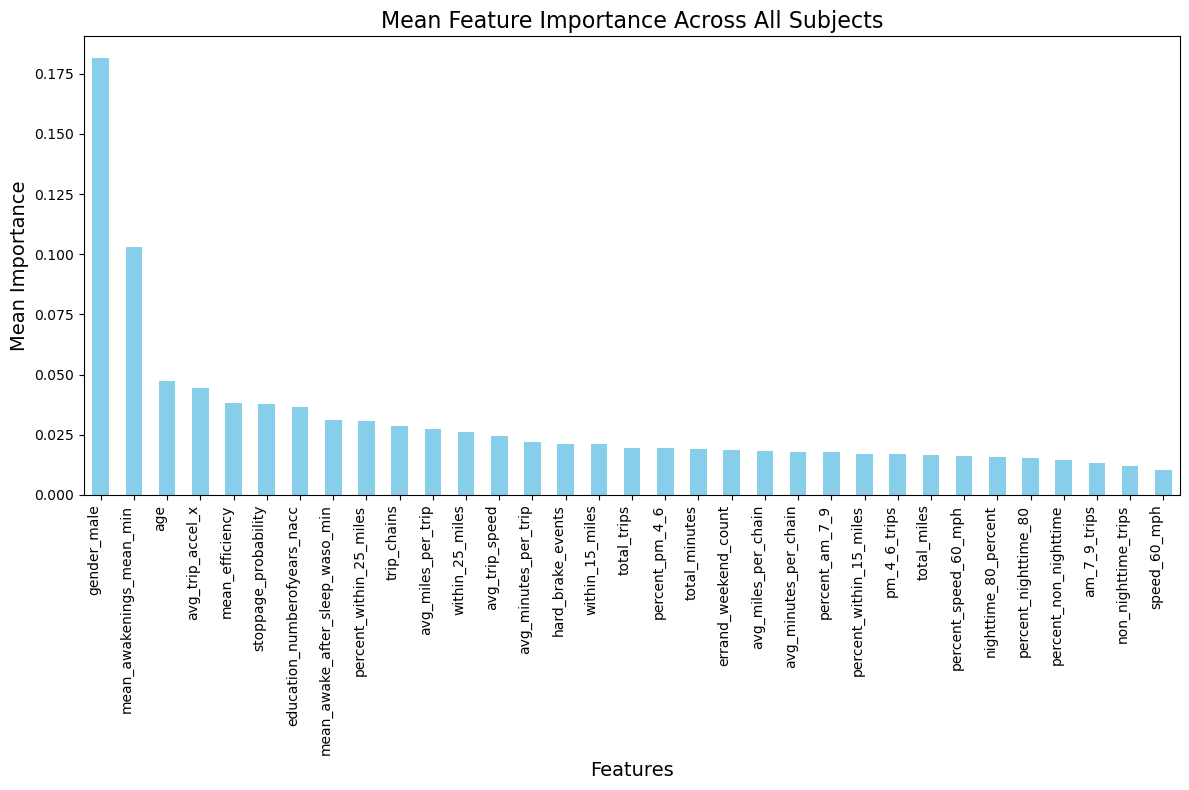

In [319]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = weekly_stats_cleaned.drop(columns=['subj_type', 'subj', 'week_number', 'education_years', 'race', 'year', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count'])
X = X.replace({None: np.nan, '': np.nan})
y = weekly_stats_cleaned['subj_type']
subjects = weekly_stats_cleaned['subj']

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}

def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Handle class imbalance
    num_class_0 = sum(y_train == 0)
    num_class_1 = sum(y_train == 1)
    scale_pos_weight = num_class_0 / num_class_1

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=80,  # Number of random combinations to try
        scoring='recall',
        cv=10,  # 10-fold cross-validation
        n_jobs=-1,  # Parallel processing within RandomizedSearchCV
        verbose=0
    )

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Save the best model for this subject
    model_filename = f"xgb_model_{left_out_subject}.joblib"
    dump(best_model, model_filename)  # Save the model to disk
    print(f"Best model for subject {left_out_subject} saved as {model_filename}")

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances from the best model
    try:
        feature_importances = best_model.feature_importances_
    except AttributeError:
        print(f"Warning: feature_importances_ not available for subject {left_out_subject}")
        feature_importances = None

    # Collect results
    subject_results = []
    for true_label, predicted_label, idx in zip(y_test, y_pred, X_test.index):
        subject_results.append([left_out_subject, idx, true_label, predicted_label, train_accuracy, test_accuracy, random_search.best_params_])

    return subject_results, feature_importances

# Run the LOSOCV loop in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    print("\nMean Feature Importance Across All Subjects:")
    print(mean_feature_importance)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")


In [323]:
# Define the file path
#file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/losocv_results_with_hyperparameter_tuning_parallel_all_var.csv'

# Read the CSV file into a DataFrame
#losocv_results= pd.read_csv(file_path)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract true labels and predicted labels
true_labels = losocv_results['True Label']
predicted_labels = losocv_results['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6457
Precision: 0.7020
Recall: 0.7219
F1 Score: 0.7118


In [421]:
# Define the file path
file_path =  r'C:/Users/aparnaj8/Box/InTrans/RWRAD_Internal/Final_files_with_variables/Final_list_of_variables/weekly_stats_demo_cleaned_for_model_future_year.csv'

# Read the CSV file into a DataFrame
merged_data= pd.read_csv(file_path)

In [423]:
merged_data.dtypes

subj                                object
week_number                          int64
year                                 int64
total_miles                        float64
total_trips                          int64
avg_miles_per_trip                 float64
total_minutes                      float64
avg_minutes_per_trip               float64
non_nighttime_trips                  int64
percent_non_nighttime              float64
am_7_9_trips                         int64
percent_am_7_9                     float64
nighttime_80_percent                 int64
percent_nighttime_80               float64
pm_4_6_trips                         int64
percent_pm_4_6                     float64
within_15_miles                      int64
percent_within_15_miles            float64
within_25_miles                      int64
percent_within_25_miles            float64
trip_chains                          int64
avg_miles_per_chain                float64
avg_minutes_per_chain              float64
speed_60_mp

In [425]:
# Drop rows where 'subj_type2' is NaN
merged_data = merged_data.dropna(subset=['subj_type2'])

len(merged_data)

1364

In [427]:
merged_data['gender'].unique()

array(['male', 'female'], dtype=object)

In [429]:
merged_data['subj'].nunique()

106

In [431]:
# Apply one-hot encoding using pd.get_dummies for 'gender' and 'race'
merged_data = pd.get_dummies(merged_data, columns=['gender'], drop_first=True)

In [433]:
# Ensure you are modifying the original DataFrame using .loc[]
merged_data.loc[:, 'subj_type2'] = merged_data['subj_type2'].apply(lambda x: 1 if x in ['mci', 'alzheimers'] else 0)

## mci/alzheimers= 1 and normalaging =0

In [435]:
merged_data[['avg_miles_per_chain', 'avg_minutes_per_chain']] = merged_data[['avg_miles_per_chain', 'avg_minutes_per_chain']].fillna(0)
# Fill NaN values with 0 in the specific columns
columns_to_fill = [
    'errand_weekend_count', 
    'home_weekday_count', 
    'medical_weekday_count', 
    'none_weekday_count', 
    'social_weekday_count'
]

merged_data[columns_to_fill] = merged_data[columns_to_fill].fillna(0)

#weekly_stats_cleaned['race_white'] = weekly_stats_cleaned['race_white'].astype(int)
merged_data['gender_male'] = merged_data['gender_male'].astype(int)
merged_data['subj_type2'] = merged_data['subj_type2'].astype(int)

In [437]:
len(merged_data)

1364

In [439]:
# Count the number of 0s and 1s in 'subj_type2'
value_counts = merged_data['subj_type2'].value_counts()

print(value_counts)


subj_type2
1    764
0    600
Name: count, dtype: int64


### Directly run model and train it on future disease status

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  70 out of 106 | elapsed: 10.8min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  81 out of 106 | elapsed: 11.2min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  92 out of 106 | elapsed: 12.8min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done 103 out of 106 | elapsed: 13.0min remaining:   22.6s



Mean Feature Importance Across All Subjects:
gender_male                        0.292792
age                                0.080319
mean_awakenings_mean_min           0.056017
avg_trip_accel_x                   0.052387
mean_awake_after_sleep_waso_min    0.040710
education_numberofyears_nacc       0.037867
mean_efficiency                    0.034661
percent_speed_60_mph               0.032604
avg_trip_speed                     0.028887
stoppage_probability               0.028535
speed_60_mph                       0.026718
within_15_miles                    0.026372
avg_miles_per_trip                 0.023275
trip_chains                        0.020142
am_7_9_trips                       0.019181
total_minutes                      0.018138
percent_pm_4_6                     0.017556
non_nighttime_trips                0.016452
total_miles                        0.015194
hard_brake_events                  0.014941
avg_minutes_per_trip               0.014061
total_trips                   

[Parallel(n_jobs=-1)]: Done 106 out of 106 | elapsed: 13.2min finished


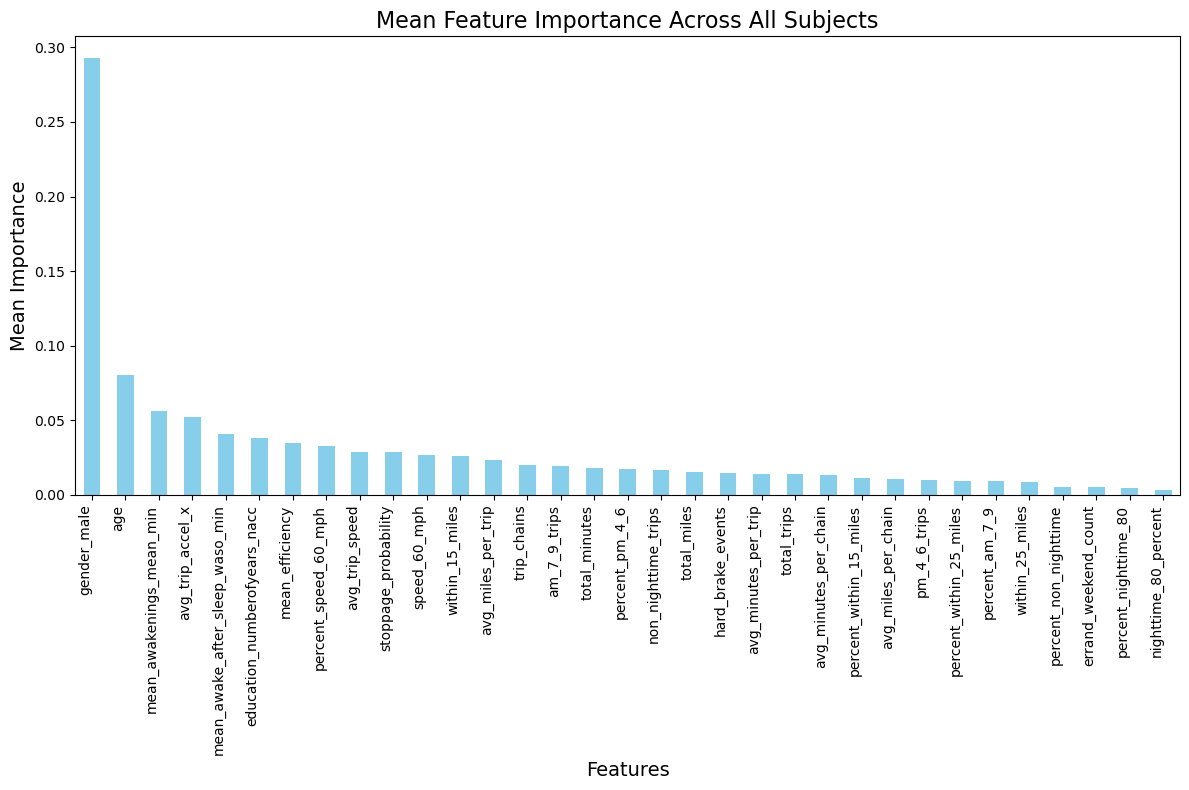

In [240]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_stats_cleaned is your original dataframe
X = merged_data.drop(columns=['subj_type','subj_type2', 'subj', 'week_number', 'education_years', 'race', 'year','year2', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count'])
X = X.replace({None: np.nan, '': np.nan})
y = merged_data['subj_type2']
subjects =merged_data['subj']

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [1, 5, 10],
    'reg_lambda': [5, 10, 15],
    'subsample': [0.7, 0.8],  # Add row sampling
    'colsample_bytree': [0.7, 0.8]  # Add column sampling
}

def losocv_for_subject(left_out_subject):
    """Perform LOSOCV with hyperparameter tuning for a given subject."""
    train_mask = subjects != left_out_subject
    test_mask = subjects == left_out_subject

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Handle class imbalance
    num_class_0 = sum(y_train == 0)
    num_class_1 = sum(y_train == 1)
    scale_pos_weight = num_class_0 / num_class_1

    # Initialize the XGBClassifier
    xgb_model = XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        missing=np.nan,
        scale_pos_weight=scale_pos_weight
    )

    # Use RandomizedSearchCV for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=80,  # Number of random combinations to try
        scoring='recall',
        cv=10,  # 10-fold cross-validation
        n_jobs=-1,  # Parallel processing within RandomizedSearchCV
        verbose=0
    )

    # Fit RandomizedSearchCV on training data
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Get feature importances from the best model
    try:
        feature_importances = best_model.feature_importances_
    except AttributeError:
        print(f"Warning: feature_importances_ not available for subject {left_out_subject}")
        feature_importances = None

    # Collect results
    subject_results = []
    for true_label, predicted_label, idx in zip(y_test, y_pred, X_test.index):
        subject_results.append([left_out_subject, idx, true_label, predicted_label, train_accuracy, test_accuracy, random_search.best_params_])

    return subject_results, feature_importances


# Run the LOSOCV loop in parallel
results = Parallel(n_jobs=-1, verbose=10)(
    delayed(losocv_for_subject)(subject) for subject in subjects.unique()
)

# Separate results and feature importances
flattened_results = []
all_feature_importances = []
for subject_result, feature_importance in results:
    flattened_results.extend(subject_result)
    if feature_importance is not None:
        all_feature_importances.append(feature_importance)

# Convert results into a DataFrame
losocv_results = pd.DataFrame(flattened_results, columns=["Subject", "Data Point Index", "True Label", "Predicted Label", "Training Accuracy", "Test Accuracy", "Best Hyperparameters"])

# Check if we have any feature importances
if all_feature_importances:
    # Compute mean feature importance across all subjects
    feature_names = X.columns
    feature_importance_df = pd.DataFrame(all_feature_importances, columns=feature_names)
    mean_feature_importance = feature_importance_df.mean().sort_values(ascending=False)

    print("\nMean Feature Importance Across All Subjects:")
    print(mean_feature_importance)

    # Plotting
    plt.figure(figsize=(12, 8))
    mean_feature_importance.plot(kind='bar', color='skyblue')
    plt.title("Mean Feature Importance Across All Subjects", fontsize=16)
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Mean Importance", fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("No feature importances were collected. Check if the model supports feature_importances_.")

losocv_results.to_csv("losocv_results_with_hyperparameter_tuning_parallel_all_var_future.csv", index=False)
mean_feature_importance.to_csv("mean_feature_importance_all_var_future.csv", index=True)

In [241]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Extract true labels and predicted labels
true_labels = losocv_results['True Label']
predicted_labels = losocv_results['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#.to_csv("losocv_results_with_hyperparameter_tuning_parallel_all_var.csv", index=False)
#mean_feature_importance.to_csv("mean_feature_importance_all_var.csv", index=True)

Accuracy: 0.6921
Precision: 0.7228
Recall: 0.7304
F1 Score: 0.7266


### Use the saved models for future prediction

In [441]:
merged_data.head()

,subj,week_number,year,total_miles,total_trips,avg_miles_per_trip,total_minutes,avg_minutes_per_trip,non_nighttime_trips,percent_non_nighttime,...,mean_awakenings_mean_min,mean_awake_after_sleep_waso_min,errand_weekend_count,home_weekday_count,medical_weekday_count,none_weekday_count,social_weekday_count,year2,subj_type2,gender_male
0,RWRAD_001,11,2021,81.858703,17,4.815218,284.533333,16.737255,17,100.0,...,NaN,NaN,1.0,6.0,1.0,0.0,0.0,2022.0,1,1
1,RWRAD_001,12,2021,89.800539,22,4.081843,303.000000,13.772727,22,100.0,...,NaN,NaN,2.0,8.0,0.0,0.0,0.0,2022.0,1,1
2,RWRAD_001,13,2021,311.730769,31,10.055831,612.866667,19.769892,31,100.0,...,3.061806,45.250000,0.0,12.0,0.0,0.0,0.0,2022.0,1,1
3,RWRAD_001,14,2021,83.971941,26,3.229690,311.983333,11.999359,26,100.0,...,3.095035,45.714286,3.0,7.0,0.0,0.0,0.0,2022.0,1,1
4,RWRAD_001,15,2021,151.992413,20,7.599621,296.400000,14.820000,20,100.0,...,4.256156,53.857143,1.0,6.0,0.0,0.0,0.0,2022.0,1,1


In [443]:
from joblib import load
import pandas as pd

# Assuming `new_data` is your current year data with the same features as the original model
# Prepare the input features (same as X for training)
merged_data_future = merged_data.drop(columns=['subj_type', 'week_number', 'education_years', 'race', 'year','year2', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count'])  # Drop non-feature columns

In [445]:
len(merged_data_future)

1364

In [457]:
from joblib import load
import pandas as pd
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Path where your models are saved
models_directory = r"C:\Users\aparnaj8\Box\InTrans\RWRAD_Internal\Final_files_with_variables\LOSO_CV results\Trained_models"

# Assuming `merged_data` is your current year data with the same features as the original model
# Prepare the input features (same as X for training), without dropping subj column for filtering later
merged_data_future = merged_data.drop(columns=['subj_type', 'week_number', 'education_years', 'race', 'year', 'year2', 'home_weekday_count', 'medical_weekday_count', 'none_weekday_count', 'social_weekday_count'])  # Drop non-feature columns

# X_new will only contain the features for prediction
X_new = merged_data_future.drop(columns=['subj', 'subj_type2'])

# Initialize an empty list to collect predictions
predictions = []

# Iterate over the subjects (unique subjects in the new dataset)
for subject in merged_data_future['subj'].unique():  # Use 'subj' column from merged_data_future to iterate over subjects
    # Construct the full file path to the saved model
    model_filename = os.path.join(models_directory, f"xgb_model_{subject}.joblib")
    
    # Check if the model file exists
    if os.path.exists(model_filename):
        # Print statement to track when a certain subject's model file is being loaded
        print(f"Loading model for subject: {subject}")
        
        # Load the saved model for this subject
        model = load(model_filename)
        
        # Filter the data for the current subject (use only the independent variables)
        subject_data = X_new[merged_data_future['subj'] == subject]  # Filter by 'subj' to get data for this subject
        
        # Make predictions using the saved model
        subject_predictions = model.predict(subject_data)
        
        # Store the predictions (add subject ID and predicted disease status to the list)
        for idx, prediction in zip(subject_data.index, subject_predictions):
            predictions.append([subject, idx, merged_data_future.loc[idx, 'subj_type2'], prediction])  # True label is from merged_data_future

    else:
        print(f"Model for subject {subject} not found in the directory.")

# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=["Subject", "Data Point Index", "True Label", "Predicted Label"])


Loading model for subject: RWRAD_001
Loading model for subject: RWRAD_002
Loading model for subject: RWRAD_003
Loading model for subject: RWRAD_004
Loading model for subject: RWRAD_005
Loading model for subject: RWRAD_006
Loading model for subject: RWRAD_007
Loading model for subject: RWRAD_008
Loading model for subject: RWRAD_009
Loading model for subject: RWRAD_010
Loading model for subject: RWRAD_011
Loading model for subject: RWRAD_012
Loading model for subject: RWRAD_013
Loading model for subject: RWRAD_014
Loading model for subject: RWRAD_015
Loading model for subject: RWRAD_016
Loading model for subject: RWRAD_018
Loading model for subject: RWRAD_020
Loading model for subject: RWRAD_022
Loading model for subject: RWRAD_023
Loading model for subject: RWRAD_024
Loading model for subject: RWRAD_025
Loading model for subject: RWRAD_026
Loading model for subject: RWRAD_027
Loading model for subject: RWRAD_029
Loading model for subject: RWRAD_030
Loading model for subject: RWRAD_031
L

In [459]:
predictions_df.head()

,Subject,Data Point Index,True Label,Predicted Label
0,RWRAD_001,0,1,1
1,RWRAD_001,1,1,1
2,RWRAD_001,2,1,1
3,RWRAD_001,3,1,1
4,RWRAD_001,4,1,1


In [469]:
# Save the predictions_df to CSV
predictions_df.to_csv('predictions_future_disease.csv', index=False)

print("Predictions saved to 'predictions_future_disease.csv'")


Predictions saved to 'predictions_future_disease.csv'


In [467]:
# Calculate evaluation metrics for the entire dataset
true_labels =predictions_df['True Label']
predicted_labels = predictions_df['Predicted Label']

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='binary', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='binary', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='binary')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Save the final dataset with predictions
#new_data_with_predictions.to_csv("new_data_with_predictions.csv", index=False)

# Optional: Save evaluation metrics to a CSV or a separate file
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}


Accuracy: 0.6811
Precision: 0.6951
Recall: 0.7670
F1 Score: 0.7293


## Feature Importance

In [81]:
# Define the file path
file_path =  r'C:/Users/aparn/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/mean_feature_importance_all_var.csv'

# Read the CSV file into a DataFrame
feature_df= pd.read_csv(file_path)

In [82]:
feature_df.head()

,Features,Importance
0,gender_male,0.184092
1,mean_awakenings_mean_min,0.107658
2,age,0.047222
3,avg_trip_accel_x,0.043994
4,mean_efficiency,0.038357


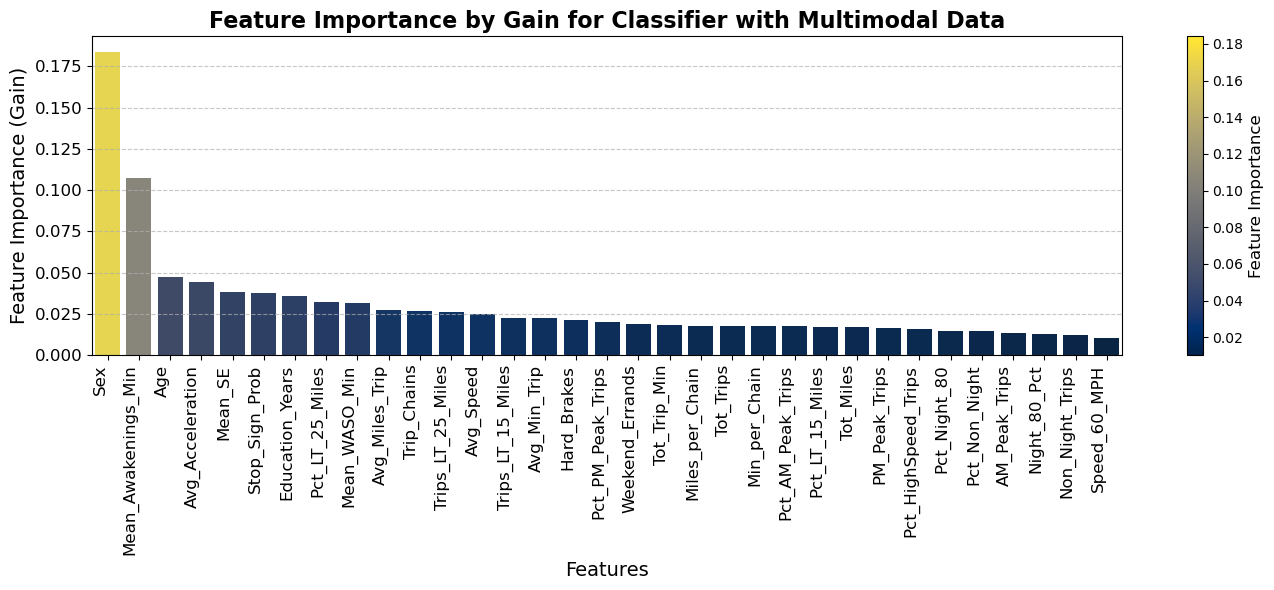

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature name mapping
feature_name_mapping = {
    'gender_male': 'Sex',
    'mean_awakenings_mean_min': 'Mean_Awakenings_Min',
    'age': 'Age',
    'avg_trip_accel_x': 'Avg_Acceleration',
    'mean_efficiency': 'Mean_SE',
    'stoppage_probability': 'Stop_Sign_Prob',
    'education_numberofyears_nacc': 'Education_Years',
    'percent_within_25_miles': 'Pct_LT_25_Miles',
    'mean_awake_after_sleep_waso_min': 'Mean_WASO_Min',
    'avg_miles_per_trip': 'Avg_Miles_Trip',
    'trip_chains': 'Trip_Chains',
    'within_25_miles': 'Trips_LT_25_Miles',
    'avg_trip_speed': 'Avg_Speed',
    'within_15_miles': 'Trips_LT_15_Miles',
    'avg_minutes_per_trip': 'Avg_Min_Trip',
    'hard_brake_events': 'Hard_Brakes',
    'percent_pm_4_6': 'Pct_PM_Peak_Trips',
    'errand_weekend_count': 'Weekend_Errands',
    'total_minutes': 'Tot_Trip_Min',
    'avg_miles_per_chain': 'Miles_per_Chain',
    'total_trips': 'Tot_Trips',
    'avg_minutes_per_chain': 'Min_per_Chain',
    'percent_am_7_9': 'Pct_AM_Peak_Trips',
    'percent_within_15_miles': 'Pct_LT_15_Miles',
    'total_miles': 'Tot_Miles',
    'pm_4_6_trips': 'PM_Peak_Trips',
    'percent_speed_60_mph': 'Pct_HighSpeed_Trips',
    'percent_nighttime_80': 'Pct_Night_80',
    'percent_non_nighttime': 'Pct_Non_Night',
    'am_7_9_trips': 'AM_Peak_Trips',
    'nighttime_80_percent': 'Night_80_Pct',
    'non_nighttime_trips': 'Non_Night_Trips',
    'speed_60_mph': 'Speed_60_MPH'
}

# Apply feature name mapping safely
feature_df['Features'] = feature_df['Features'].replace(feature_name_mapping)

# Sort features by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Generate a smooth color gradient from a colorblind-friendly palette
cmap = sns.color_palette("cividis", as_cmap=True)  # cividis for colorblind-friendly gradient
norm = plt.Normalize(feature_df['Importance'].min(), feature_df['Importance'].max())
colors = [cmap(norm(value)) for value in feature_df['Importance']]

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
bars = sns.barplot(x='Features', y='Importance', data=feature_df, palette=colors, ax=ax)

# Formatting
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Feature Importance (Gain)', fontsize=14)
ax.set_title('Feature Importance by Gain for Classifier with Multimodal Data', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotate feature names for better visibility
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap="cividis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Feature Importance", fontsize=12)

plt.tight_layout()
plt.show()


In [84]:
# Save the plot to a file
plot_file_path = "C:/Users/aparn/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/feature_importance_plot.png"
fig.tight_layout()
fig.savefig(plot_file_path)


# Return the file path to download
plot_file_path

'C:/Users/aparn/Box/InTrans/RWRAD_Internal/Final_files_with_variables/LOSO_CV results/feature_importance_plot.png'